### INTRODUCTION

The Project focuses on extracting the reaction and sentiments of fans on twitter ,following the sack of chelsea manager Graham potter and their view on the potential candidates to repalce him as manager of the club.

#### NOTE
Reports say Graham potter was sacked at exactly 2.45 pm on Sunday but the news did not become common knowlegde until the 3rd of april (Monday), so tweets from the 3rd will be scraped till the appointment of a new manager 

we will follow the trends and try to see if the appointment will go in favour of the fans choice 

##### METHOD
We will be using snscrape sraper for social networking services, we could automate the scraping but with the new twitter restrictions their might be consequences , so instead we will scrape 2000 tweets for every 12 hours and we look at the trends of the last scrapes before the official announcement of the next manager.

Also the sentiment analysis will be done in another notebook , where we can easily initate GPU instance and most required packages are already installed.

In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import snscrape.modules.twitter as sntwitter
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

In [2]:
#this is an advanced search of the required tweets 
query = "Chelsea lang:en since:2023-04-03"

In [3]:
scraper= sntwitter.TwitterSearchScraper(query)

In [5]:
#lets test to see if it works
for tweet in scraper.get_items():
    break

In [6]:
#we have our tweet
tweet

Tweet(url='https://twitter.com/babyphat525/status/1643811356674764800', date=datetime.datetime(2023, 4, 6, 3, 2, 22, tzinfo=datetime.timezone.utc), rawContent='Blithe Doyle Candice Geordie #合肥旅游 #合肥 https://t.co/F0HA92j8hU', renderedContent='Blithe Doyle Candice Geordie #合肥旅游 #合肥 https://t.co/F0HA92j8hU', id=1643811356674764800, user=User(username='babyphat525', id=567906171, displayname='Chelsea Hester', rawDescription='', renderedDescription='', descriptionLinks=None, verified=False, created=datetime.datetime(2012, 5, 1, 3, 48, 42, tzinfo=datetime.timezone.utc), followersCount=1, friendsCount=0, statusesCount=16663, favouritesCount=0, listedCount=0, mediaCount=16662, location='', protected=False, link=None, profileImageUrl='https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png', profileBannerUrl=None, label=None), replyCount=0, retweetCount=0, likeCount=0, quoteCount=0, conversationId=1643811356674764800, lang='en', source='<a href="https://mobile.twitter.com

In [62]:
# turning our tweets into a dataframe and setting restrictions
scraper= sntwitter.TwitterSearchScraper(query)

tweets = []
n_tweets = 2_000
for i, tweet in tqdm(enumerate(scraper.get_items()), total= n_tweets):
    data= [
        tweet.date,
        tweet.id,
        tweet.content,
        tweet.user.username,
        tweet.likeCount, 
        tweet.retweetCount]
    
    tweets.append(data)
    if i > n_tweets:
        break
        
tweets_df = pd.DataFrame(
      tweets, columns= ['date', 'id', 'content', 'username', 'like_count','retweet_count']
)
tweets_df.to_csv('chelseafc', index=False)

  0%|          | 0/2000 [00:00<?, ?it/s]

C:\Users\Lawalson\AppData\Local\Temp/ipykernel_10000/830928457.py:9: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweet.content,


In [2]:
#the last three scrapes
df=pd.read_csv('chels.csv')
df1=pd.read_csv('chelsy.csv')
df2=pd.read_csv('chelseafc.csv')

In [92]:
#lets take a look at the last srape 
df2.head(50)

,date,id,content,username,like_count,retweet_count
0,2023-04-06 03:31:43+00:00,1643818741615001602,Chelsea considering discussions with Antonio C...,hardik97494342,0,0
1,2023-04-06 03:31:41+00:00,1643818733591248899,Chelsea considering discussions with Antonio C...,rebben02664383,0,0
2,2023-04-06 03:31:40+00:00,1643818730084769792,"@sahouraxo Julian Assange, Edward Snowden, Che...",Kamelaasa,0,0
3,2023-04-06 03:31:40+00:00,1643818729212375042,@rijuu4 @FCB_Lad_ @CFCMod_ chelsea are dead as...,brandon62825580,0,0
4,2023-04-06 03:31:37+00:00,1643818717778784260,I don’t even know how to feel about Chelsea an...,djxquisite_,0,0
5,2023-04-06 03:31:28+00:00,1643818681170817025,Liverpool legend Xabi Alonso ‘a shock contende...,VouxSite,0,0
6,2023-04-06 03:31:28+00:00,1643818680059305986,@PrisciliaStelz @kofoworola__a Lampard the GOA...,elcarlitrossc4,0,0
7,2023-04-06 03:31:25+00:00,1643818665119211526,"@Ada_Daddyya Chelsea are tough opponent, with ...",ColemanDavidLe1,0,0
8,2023-04-06 03:31:23+00:00,1643818658278547456,✨✨ Good morning 🌸🌸🌸🌸🌸🌸 \n#太原资源 #太原丝足 https://t...,chelsea_shandi,0,0
9,2023-04-06 03:31:21+00:00,1643818651731066880,@_OliverKK My friend go check records of chels...,KeithKiplagat,0,0


In [93]:
df2.shape

(2002, 6)

In [3]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [4]:
unique_values(df2)

,date,id,content,username,like_count,retweet_count
Total,2002,2002,2002,2002,2002,2002
Uniques,1793,2002,1999,1273,30,12


In [94]:
#Checking for the total amount of frequent values in the data
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [95]:
most_frequent_values(df2)

,date,id,content,username,like_count,retweet_count
Total,2002,2002,2002,2002,2002,2002
Most frequent item,2023-04-06 01:23:35+00:00,1643818741615001602,Lampard was supposed to attend a promotional e...,babyphat525,0,0
Frequence,4,1,2,114,1546,1897
Percent from total,0.2,0.05,0.1,5.694,77.223,94.755


In [96]:
df2['content'][0]

'Chelsea considering discussions with Antonio Conte | Man Utd takeover talks to continue - Paper Talk - https://t.co/4wOyN24m2K'

we will need to clean the text by removing hashtags and punctuations 

In [5]:
# using regex to remove hashtags, RT, url, tags, emojis

def cleantext(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+','', txt)
    txt = re.sub(r'#','',txt) 
    txt = re.sub(r'RT :','',txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+','',txt)
    txt= re.sub(r'[^\w\s]','', txt)
    return txt

In [6]:
# lets clean all three contents
df['clean_tweet']=df['content'].apply(cleantext)
df1['clean_tweet']=df1['content'].apply(cleantext)
df2['clean_tweet']=df2['content'].apply(cleantext)

In [14]:
example=df['clean_tweet'][0]
print(example)
print("\n","*"*50)
example1=df1['clean_tweet'][0]
print(example1)
print("\n","*"*50)
example2=df2['clean_tweet'][0]
print(example2)

Luis Enrique next coach chelsea 

 **************************************************
If the idea of Super Frank as manager for two months whilst Chelsea board thoroughly plan a proper future for us doesnt excite you even a little bit Chels aint for you 

 **************************************************
Chelsea considering discussions with Antonio Conte  Man Utd takeover talks to continue  Paper Talk  


In [100]:
nltk.word_tokenize(example2)

['Chelsea',
 'considering',
 'discussions',
 'with',
 'Antonio',
 'Conte',
 'Man',
 'Utd',
 'takeover',
 'talks',
 'to',
 'continue',
 'Paper',
 'Talk']

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')

In [6]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:10], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

C:\Users\Lawalson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


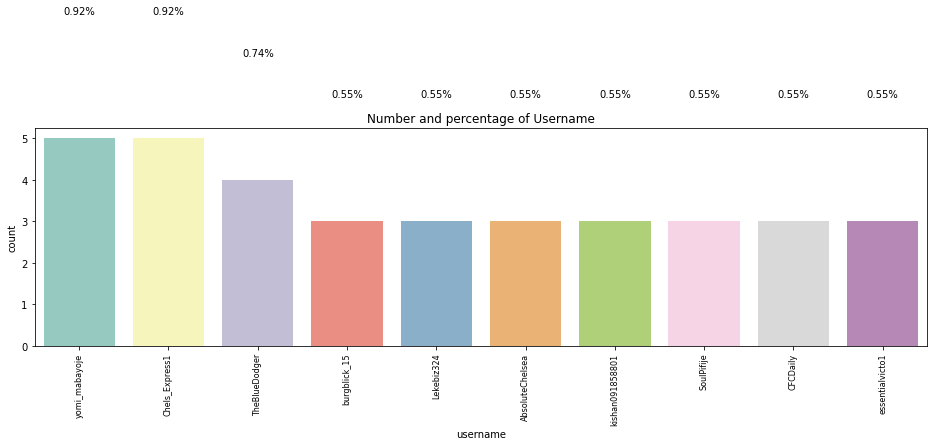

In [101]:
plot_count("username", "Username",df,4)

C:\Users\Lawalson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


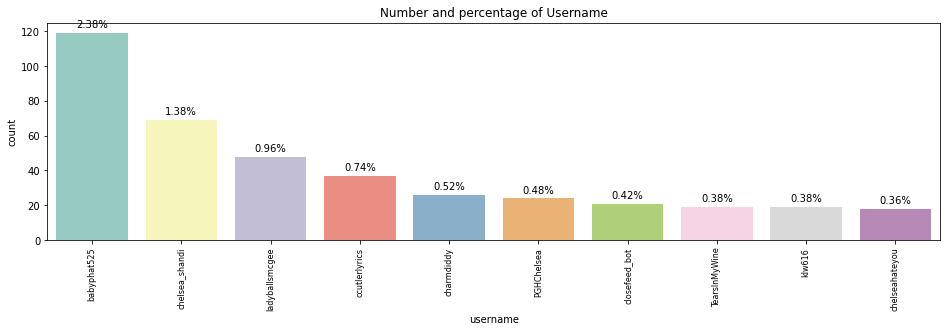

In [102]:
plot_count("username", "Username",df1,4)

C:\Users\Lawalson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


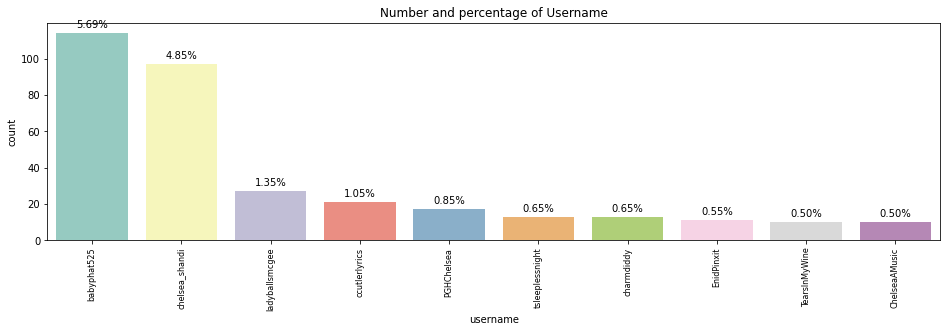

In [103]:
plot_count("username", "Username",df2,4)

In [4]:
#defining a function to extract hashtags in each tweet
def hashtag(tweet):
    tweet = tweet.lower() 
    tweet = re.findall(r'\#\w+',tweet)  
    return " ".join(tweet)

In [5]:
#applying the function and creating a new column 
df['hashtags'] = df['content'].apply(hashtag)
df1['hashtags'] = df1['content'].apply(hashtag)
df2['hashtags'] = df2['content'].apply(hashtag)

C:\Users\Lawalson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


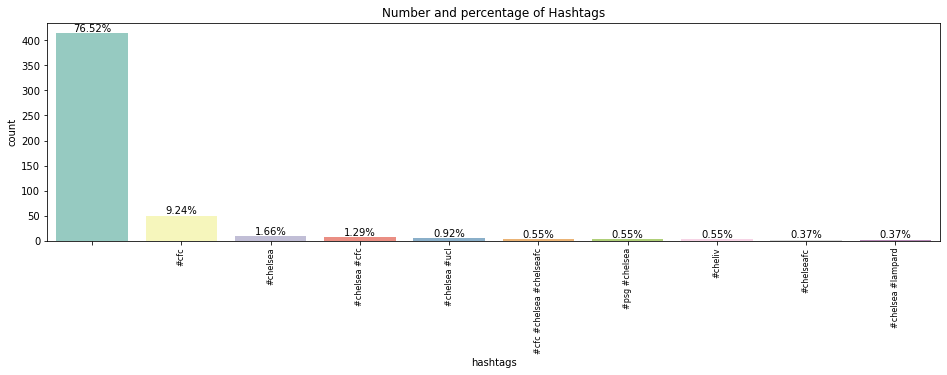

In [7]:
plot_count("hashtags", "Hashtags",df,4)

### Summary

I expected to see some popular names like Fabrizio romano and Mattlaw , but there is CFC daily and the blue dodger, these names are important as they serve as credible sources for news and updates.

we intend to also use sentimemt analysis to see who chelsea fans would prefer as their next coach, the likes_count column will be used to provide alot of information on the sway in preference with the potential managers

Hashtags show are fairly normal correlation with the tweets, but #psg hint towards PSG's plan to poach Julian nagelsmann who is a candiate to replace Potter and #lampard hints towrds the rumour of chelsea hiring lampard as interim manager till the end of the season 

In [87]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

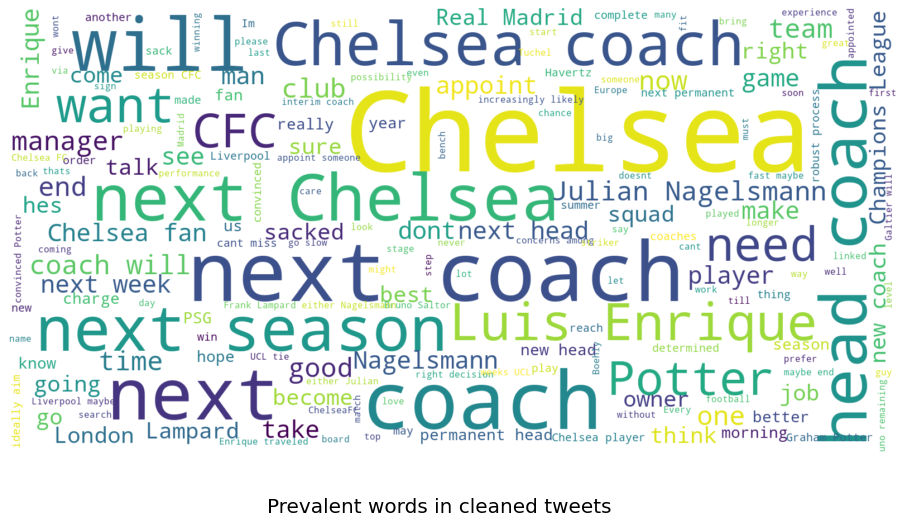

In [88]:
show_wordcloud(df['clean_tweet'], title = 'Prevalent words in cleaned tweets')

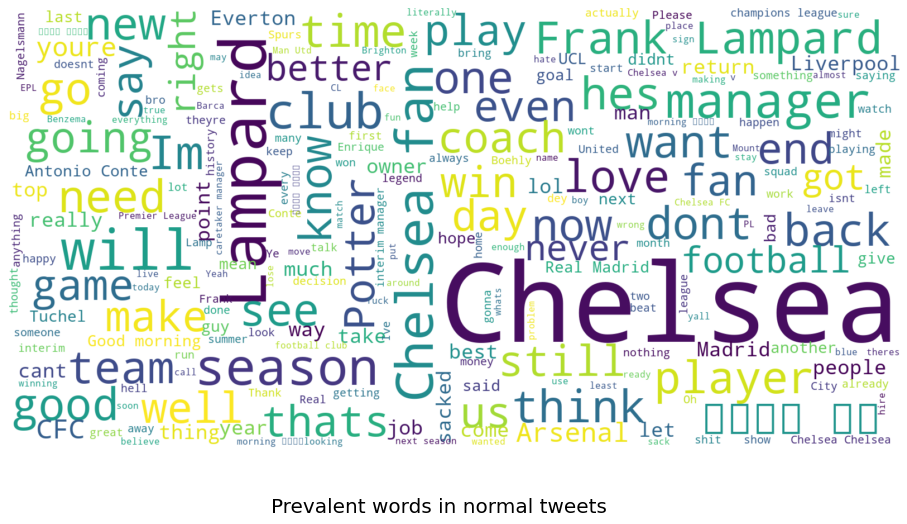

In [104]:
show_wordcloud(df1['clean_tweet'], title = 'Prevalent words in normal tweets')

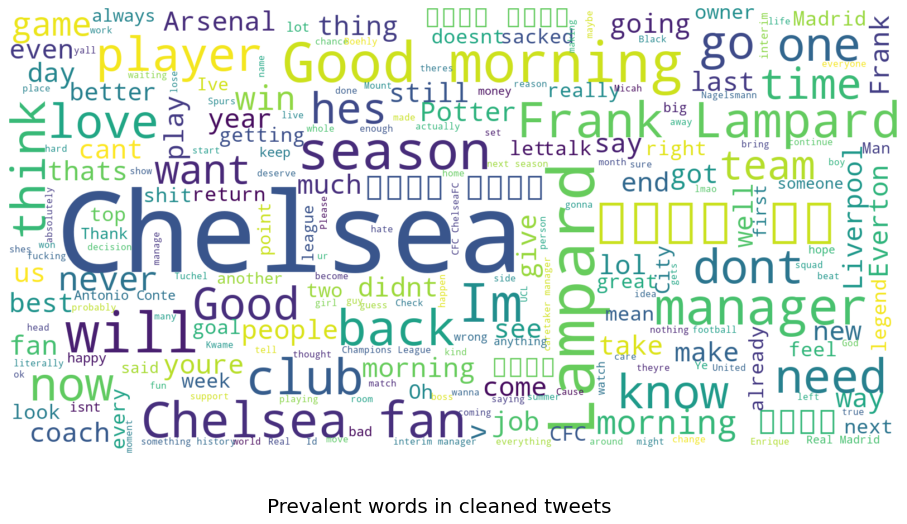

In [105]:
show_wordcloud(df2['clean_tweet'], title = 'Prevalent words in cleaned tweets')

### summary

So from the last three scrapes its interesting to see the treend , the first of three show names like Julian nagelsmann and Luis enrique being thrown around and the uncertain rise of the name Antonio conte and all of a sudden the name lampard increasing by every srape 

there are some mention of graham potter but thats clearly out of spite, we could still look into it just to be sure

In [7]:
#converting the date column to the appriopriate datatype
df['dated'] = pd.to_datetime(df['date'], errors="coerce")
df1['dated'] = pd.to_datetime(df1['date'], errors="coerce")
df2['dated'] = pd.to_datetime(df2['date'], errors="coerce")

In [8]:
# Extracting day of the week to see the days each scrape covered
df['dayofweek_name'] = df['dated'].dt.day_name()
df1['dayofweek_name'] = df1['dated'].dt.day_name()
df2['dayofweek_name'] = df2['dated'].dt.day_name()

In [111]:
#creating a line plot to visualize how a particular variable changes over time or across categories.
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

C:\Users\Lawalson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


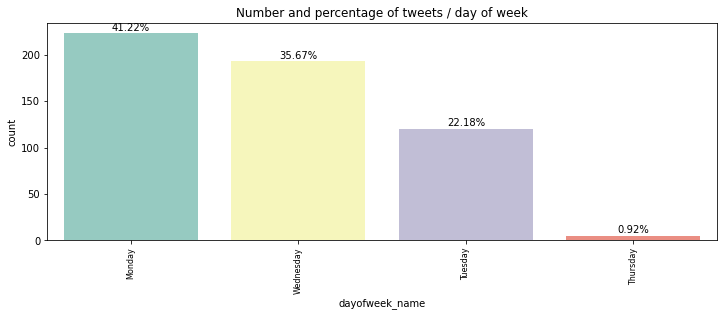

In [113]:
plot_count("dayofweek_name", "tweets / day of week", df, size=3, ordered=True)

C:\Users\Lawalson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


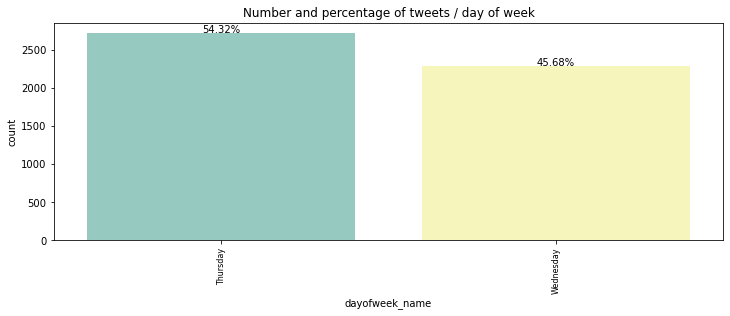

In [114]:
plot_count("dayofweek_name", "tweets / day of week", df1, size=3, ordered=True)

C:\Users\Lawalson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


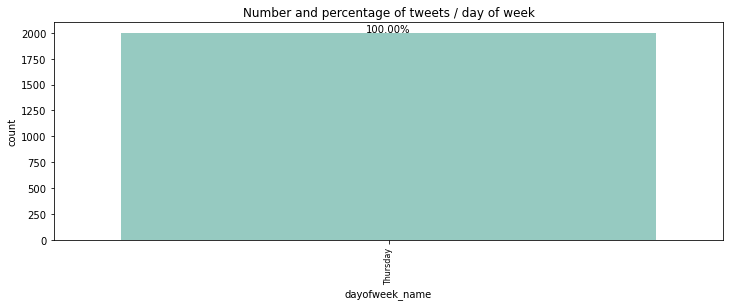

In [115]:
plot_count("dayofweek_name", "tweets / day of week", df2, size=3, ordered=True)

### Conclusion

The scraping was called to a halt on thursday as Frank lampard was appointed caretaker manager till the end of the season

the trends of the data did suggest that much but i dont think the decison was met with open arms

we will carry out further analysis on a different notebook this time with sentiment analysis using Hugging face BERT to get a deeper insight of the situation 

In [11]:
df3=pd.concat(map(pd.read_csv, ['chelsy.csv', 'chels.csv','chelseafc.csv']))

df3.to_csv("finals.csv")

In [12]:
df3.head()

,date,id,content,username,like_count,retweet_count
0,2023-04-06 03:02:44+00:00,1643811448873947138,If the idea of Super Frank as manager for two ...,MrGeorgeBenson,0,0
1,2023-04-06 03:02:22+00:00,1643811356674764800,Blithe Doyle Candice Geordie #合肥旅游 #合肥 https:/...,babyphat525,0,0
2,2023-04-06 03:02:20+00:00,1643811348470460418,@misskittyf Understandable,panelsandprose,0,0
3,2023-04-06 03:02:12+00:00,1643811312386945026,@CFCPys @Matt_Law_DT Yes I’m back on Twitter r...,OluwoleOwos,0,0
4,2023-04-06 03:02:01+00:00,1643811268695048192,…2/2. from the ‘feels’ department and to be h...,loztor,0,0
